In [1]:
# install library kaggle
!pip install -q kaggle

In [2]:
# upload kaggle.json yang sudah di download
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadrafiqpohan","key":"14e22861a7d40105acc33ff2c220bc21"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# download Dataset
!kaggle datasets download -d mczielinski/bitcoin-historical-data

Dataset URL: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
License(s): CC-BY-SA-4.0
  0% 0.00/93.9M [00:00<?, ?B/s]
100% 93.9M/93.9M [00:00<00:00, 1.37GB/s]


In [5]:
# unzip dataset
!unzip bitcoin-historical-data

Archive:  bitcoin-historical-data.zip
  inflating: btcusd_1-min_data.csv   


In [34]:
import pandas as pd
df = pd.read_csv('/content/btcusd_1-min_data.csv')
df.head(10)

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0
5,1.325412e+09,4.58,4.58,4.58,4.58,0.0
6,1.325412e+09,4.58,4.58,4.58,4.58,0.0
7,1.325412e+09,4.58,4.58,4.58,4.58,0.0
8,1.325413e+09,4.58,4.58,4.58,4.58,0.0
9,1.325413e+09,4.58,4.58,4.58,4.58,0.0


In [35]:
# Import data
import pandas as pd

df.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df.reset_index()
df.head()

,index,Timestamp,Open,High,Low,Close,Volume
0,0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [36]:
# Mengambil kolom Timestamp dan Close
data = df[['Timestamp', 'Close']]
data.tail()

,Timestamp,Close
7034125,1.747529e+09,103293.0
7034126,1.747529e+09,103338.0
7034127,1.747529e+09,103319.0
7034128,1.747529e+09,103331.0
7034129,1.747529e+09,103360.0


In [37]:
# Ubah Timestamp ke datetime
data['Date'] = pd.to_datetime(data['Timestamp'], unit='s')

# Sampling data setiap 10 menit
data = data.set_index('Date').resample('10T').mean().reset_index()

# Hapus nilai NaN yang muncul karena resampling
data.dropna(inplace=True)

<ipython-input-37-650178d51175>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Timestamp'], unit='s')
<ipython-input-37-650178d51175>:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data = data.set_index('Date').resample('10T').mean().reset_index()


In [38]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703415 entries, 0 to 703529
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       703415 non-null  datetime64[ns]
 1   Timestamp  703415 non-null  float64       
 2   Close      703415 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.5 MB


In [39]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Timestamp,0
Close,0


In [40]:
# Melihat deskripsi data
data.describe()

,Date,Timestamp,Close
count,703415,7.034150e+05,703415.000000
mean,2018-09-08 20:04:53.233722368,1.536437e+09,17678.047723
min,2012-01-01 10:00:00,1.325412e+09,4.140000
25%,2015-05-06 14:55:00,1.430924e+09,425.616500
50%,2018-09-08 19:50:00,1.536436e+09,6634.083000
75%,2022-01-12 00:45:00,1.641949e+09,27567.220000
max,2025-05-18 00:50:00,1.747529e+09,108604.800000
std,NaN,1.218367e+08,24486.727690


In [41]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional, Input

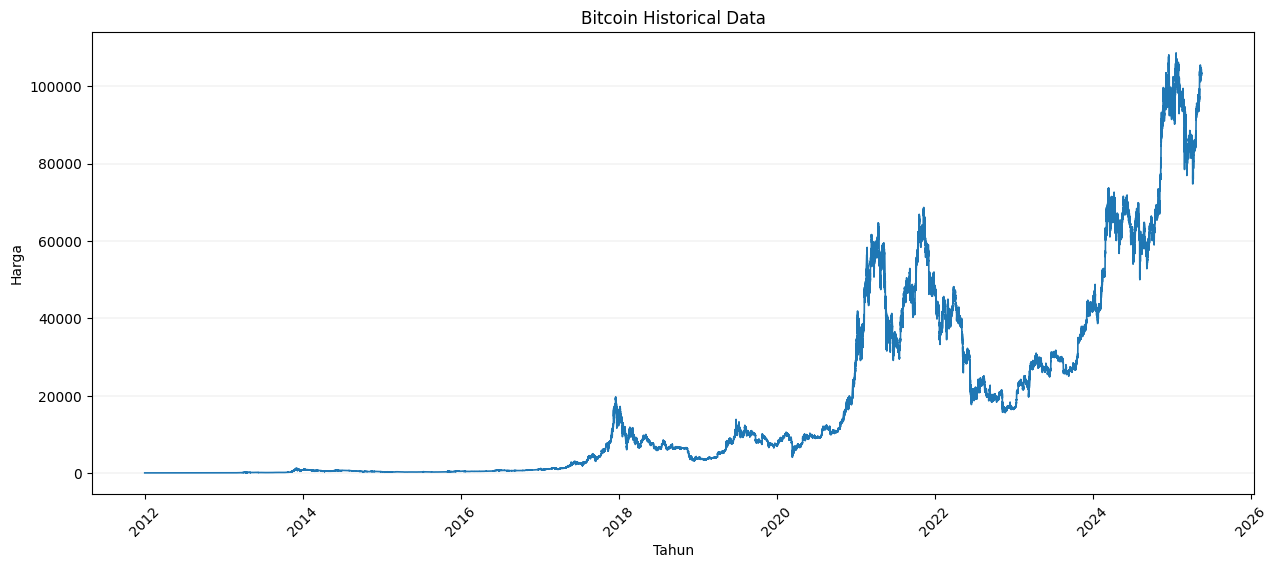

In [42]:
# Visualisasi data
import matplotlib.pyplot as plt
data['Tanggal'] = pd.to_datetime(data['Timestamp'], unit='s')
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Bitcoin Historical Data')
plt.plot(data['Tanggal'], data['Close'], linewidth=1.2)
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [43]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[4.05154075e-06],
       [4.05154075e-06],
       [4.05154075e-06],
       ...,
       [9.51032526e-01],
       [9.51288510e-01],
       [9.51705634e-01]])

In [44]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [45]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 703415
Jumlah data training: 562732
Jumlah data validasi: 70342
Jumlah data testing:70341


In [46]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [47]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [48]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [49]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [50]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [51]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

# **==============Bi-LSTM==============**

In [52]:
# Membangun model Bi-LSTM
import tensorflow as tf
from keras.layers import Dense, Dropout, Input
from keras.layers import Bidirectional
from keras.models import Sequential

model_bilstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(LSTM(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [53]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_bilstm_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [54]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_bilstm.compile(optimizer=op, loss='mean_squared_error')

In [109]:
# Melakukan training pada model LSTM
history_bilstm = model_bilstm.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/50
17580/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.8659e-05
Epoch 1: val_loss did not improve from 0.00000
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 198s 11ms/step - loss: 6.8658e-05 - val_loss: 2.4530e-05
Epoch 2/50
17583/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3755e-05
Epoch 2: val_loss did not improve from 0.00000
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 202s 11ms/step - loss: 6.3755e-05 - val_loss: 4.4856e-06
Epoch 3/50
17583/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2592e-05
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoints/weights_stacked_lstm_model.weights.h5
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 201s 11ms/step - loss: 6.2592e-05 - val_loss: 2.4114e-06
Epoch 4/50
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1276e-05
Epoch 4: val_loss did not improve from 0.00000
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 201s 11ms/step - loss: 6.1276e-05 - val_loss: 2.0554e-05
Epoch 5/50
17584/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0533

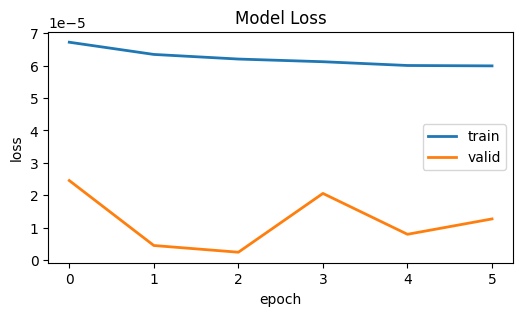

In [110]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_bilstm.history['loss'], linewidth=2)
plt.plot(history_bilstm.history['val_loss'], linewidth=2)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [111]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [112]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [113]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [114]:
# Load bobot model terbaik
model_bilstm.load_weights("/content/model_checkpoints/weights_bilstm_model.weights.h5")

In [115]:
# Melakukan prediksi
y_pred = model_bilstm.predict(x_test)
y_pred = np.ceil(sc.inverse_transform(y_pred))

2199/2199 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step


In [116]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')

MSE  : 1240368.31
RMSE : 1113.72
MAE  : 806.86
MAPE : 0.97 %


In [117]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Timestamp,Close,Tanggal,Prediction
633074,2024-01-14 18:20:00,1.705257e+09,42784.8,2024-01-14 18:24:30,42869.0
633075,2024-01-14 18:30:00,1.705257e+09,42806.7,2024-01-14 18:34:30,42866.0
633076,2024-01-14 18:40:00,1.705258e+09,42796.0,2024-01-14 18:44:30,42865.0
633077,2024-01-14 18:50:00,1.705258e+09,42873.7,2024-01-14 18:54:30,42862.0
633078,2024-01-14 19:00:00,1.705259e+09,42921.5,2024-01-14 19:04:30,42862.0
...,...,...,...,...,...
703525,2025-05-18 00:10:00,1.747527e+09,103263.2,2025-05-18 00:14:30,101057.0
703526,2025-05-18 00:20:00,1.747528e+09,103255.2,2025-05-18 00:24:30,101067.0
703527,2025-05-18 00:30:00,1.747528e+09,103286.9,2025-05-18 00:34:30,101076.0
703528,2025-05-18 00:40:00,1.747529e+09,103314.7,2025-05-18 00:44:30,101087.0


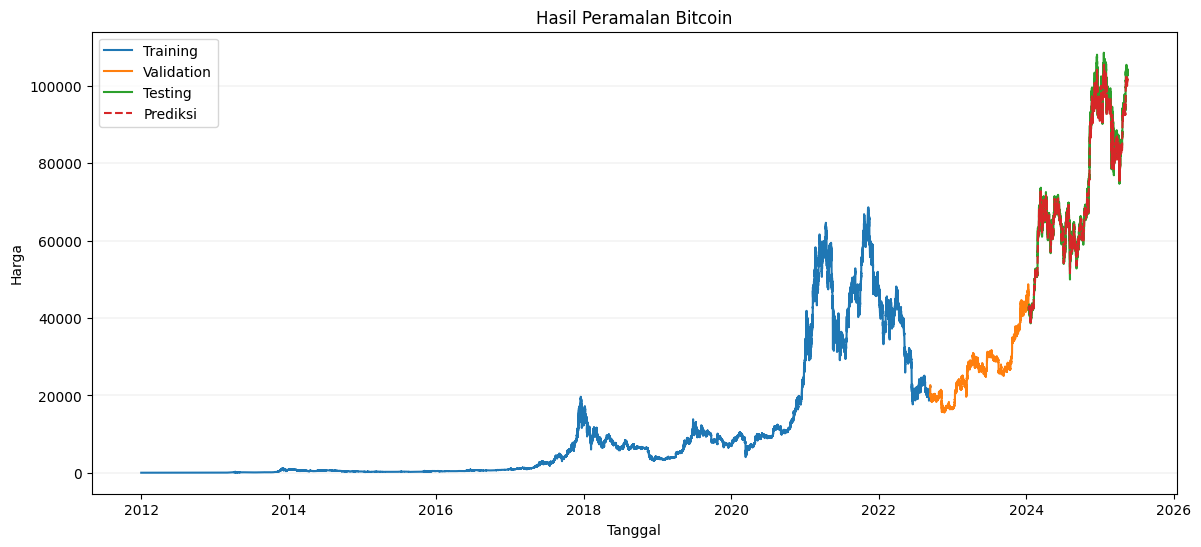

In [118]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Bitcoin')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

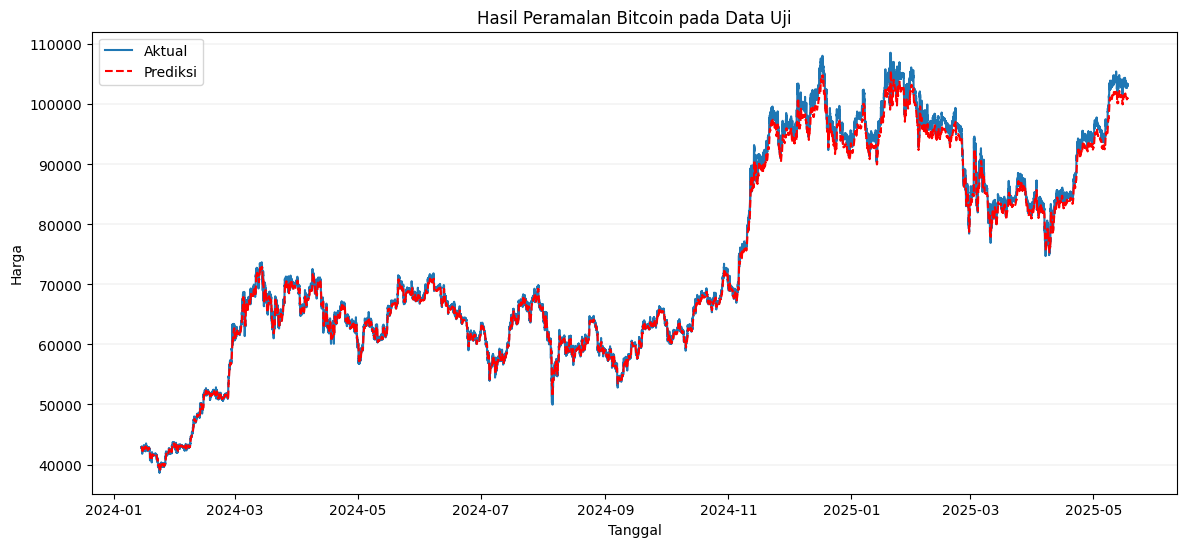

In [119]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Bitcoin pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **==============LSTM==============**

In [71]:
# Membangun model LSTM
import tensorflow as tf
from keras.layers import Dense, Dropout, Input, LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

model_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [72]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_lstm_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [73]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_lstm.compile(optimizer=op, loss='mean_squared_error')

In [77]:
# Melakukan training pada model LSTM
history_lstm = model_lstm.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/50
17584/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0337e-04
Epoch 1: val_loss improved from inf to 0.00008, saving model to model_checkpoints/weights_bigru_model.weights.h5
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 177s 10ms/step - loss: 1.0337e-04 - val_loss: 7.7448e-05
Epoch 2/50
17581/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2336e-05
Epoch 2: val_loss improved from 0.00008 to 0.00000, saving model to model_checkpoints/weights_bigru_model.weights.h5
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 126s 7ms/step - loss: 7.2336e-05 - val_loss: 4.5006e-06
Epoch 3/50
17577/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8318e-05
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoints/weights_bigru_model.weights.h5
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 124s 7ms/step - loss: 6.8317e-05 - val_loss: 2.3373e-06
Epoch 4/50
17579/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4974e-05
Epoch 4: val_loss did not improve from 0.00000
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 148s 

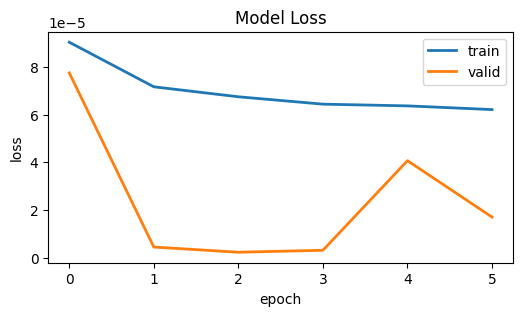

In [78]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_lstm.history['loss'], linewidth=2)
plt.plot(history_lstm.history['val_loss'], linewidth=2)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [79]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [80]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [81]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [85]:
# Load bobot model terbaik
model_lstm.load_weights("/content/model_checkpoints/weights_lstm_model.weights.h5")

In [86]:
# Melakukan prediksi
y_pred = model_lstm.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

2199/2199 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [87]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(np.mean(y_test - y_pred)**2), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')

MSE  : 2211459.22
RMSE : 1059.51
MAE  : 1101.66
MAPE : 1.3 %


In [88]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Timestamp,Close,Tanggal,Prediction
633074,2024-01-14 18:20:00,1.705257e+09,42784.8,2024-01-14 18:24:30,42848.929688
633075,2024-01-14 18:30:00,1.705257e+09,42806.7,2024-01-14 18:34:30,42842.015625
633076,2024-01-14 18:40:00,1.705258e+09,42796.0,2024-01-14 18:44:30,42836.402344
633077,2024-01-14 18:50:00,1.705258e+09,42873.7,2024-01-14 18:54:30,42831.636719
633078,2024-01-14 19:00:00,1.705259e+09,42921.5,2024-01-14 19:04:30,42829.617188
...,...,...,...,...,...
703525,2025-05-18 00:10:00,1.747527e+09,103263.2,2025-05-18 00:14:30,100161.953125
703526,2025-05-18 00:20:00,1.747528e+09,103255.2,2025-05-18 00:24:30,100165.367188
703527,2025-05-18 00:30:00,1.747528e+09,103286.9,2025-05-18 00:34:30,100170.195312
703528,2025-05-18 00:40:00,1.747529e+09,103314.7,2025-05-18 00:44:30,100176.671875


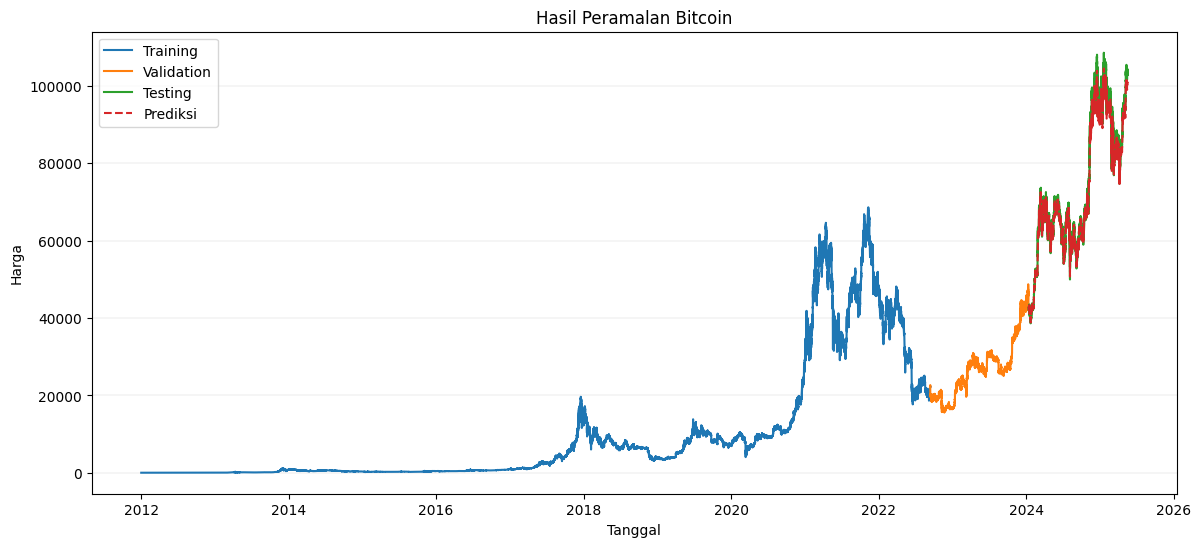

In [89]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Bitcoin')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

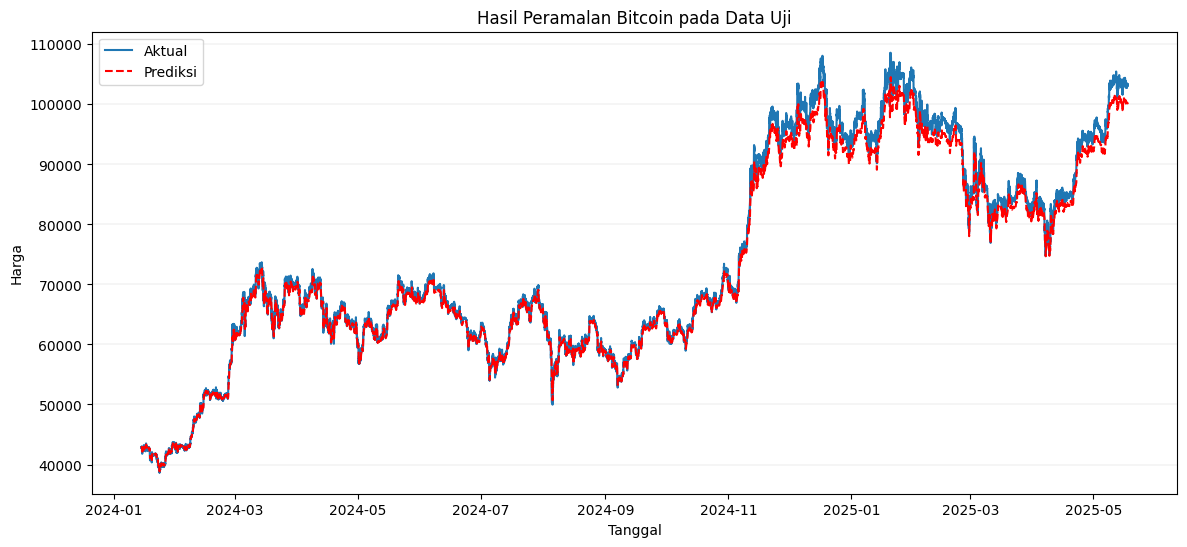

In [90]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Bitcoin pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **==============Stacked-LSTM==============**

In [91]:
# Membangun model Stacked LSTM
import tensorflow as tf
from keras.layers import Dense, Dropout, Input, LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

model_stacked_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [92]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_stacked_lstm_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [93]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_stacked_lstm.compile(optimizer=op, loss='mean_squared_error')

In [94]:
# Melakukan training pada model LSTM
history_stacked_lstm = model_stacked_lstm.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/50
17580/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3918e-04
Epoch 1: val_loss improved from inf to 0.00000, saving model to model_checkpoints/weights_stacked_lstm_model.weights.h5
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 229s 9ms/step - loss: 3.3912e-04 - val_loss: 2.5047e-06
Epoch 2/50
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0310e-05
Epoch 2: val_loss did not improve from 0.00000
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 192s 9ms/step - loss: 8.0310e-05 - val_loss: 2.2894e-05
Epoch 3/50
17582/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.2982e-05
Epoch 3: val_loss did not improve from 0.00000
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 204s 9ms/step - loss: 7.2982e-05 - val_loss: 1.7517e-05
Epoch 4/50
17579/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0567e-05
Epoch 4: val_loss did not improve from 0.00000
17585/17585 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - loss: 7.0567e-05 - val_loss: 1.3976e-05
Epoch 5/50
17583/17585 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7606e-05
Epoch 5:

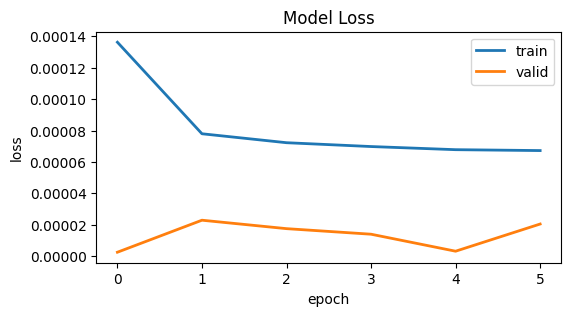

In [95]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_stacked_lstm.history['loss'], linewidth=2)
plt.plot(history_stacked_lstm.history['val_loss'], linewidth=2)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [96]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [97]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [98]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [99]:
# Load bobot model terbaik
model_stacked_lstm.load_weights("/content/model_checkpoints/weights_stacked_lstm_model.weights.h5")

In [100]:
# Melakukan prediksi
y_pred = model_stacked_lstm.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

2199/2199 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [101]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(np.mean(y_test - y_pred)**2), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')

MSE  : 4654791.2
RMSE : 1575.74
MAE  : 1612.04
MAPE : 1.9 %


In [102]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Timestamp,Close,Tanggal,Prediction
633074,2024-01-14 18:20:00,1.705257e+09,42784.8,2024-01-14 18:24:30,42796.046875
633075,2024-01-14 18:30:00,1.705257e+09,42806.7,2024-01-14 18:34:30,42788.250000
633076,2024-01-14 18:40:00,1.705258e+09,42796.0,2024-01-14 18:44:30,42780.843750
633077,2024-01-14 18:50:00,1.705258e+09,42873.7,2024-01-14 18:54:30,42773.656250
633078,2024-01-14 19:00:00,1.705259e+09,42921.5,2024-01-14 19:04:30,42767.054688
...,...,...,...,...,...
703525,2025-05-18 00:10:00,1.747527e+09,103263.2,2025-05-18 00:14:30,98785.867188
703526,2025-05-18 00:20:00,1.747528e+09,103255.2,2025-05-18 00:24:30,98783.585938
703527,2025-05-18 00:30:00,1.747528e+09,103286.9,2025-05-18 00:34:30,98782.453125
703528,2025-05-18 00:40:00,1.747529e+09,103314.7,2025-05-18 00:44:30,98782.601562


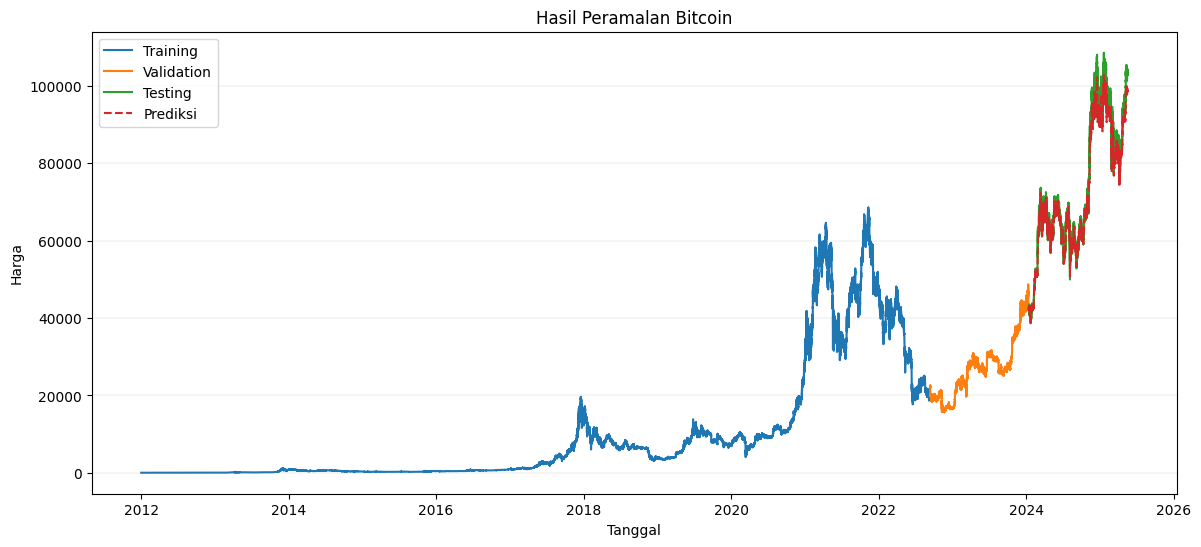

In [103]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Bitcoin')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

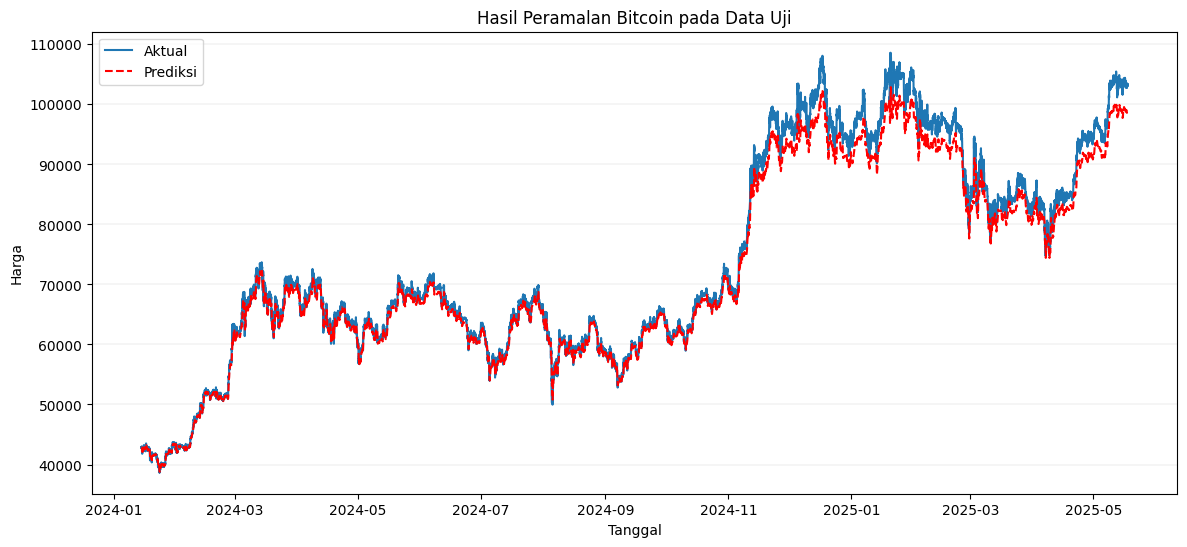

In [104]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Bitcoin pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **==================================================**

In [120]:
def forecast_next_30_days(model, last_data, scaler, days=30):
    forecast = []
    input_seq = last_data[-30:].reshape(1, 30, 1)  # ambil 30 data terakhir
    for _ in range(days):
        pred = model.predict(input_seq, verbose=0)
        forecast.append(pred[0,0])
        # Masalahnya ada pada [[pred]]. pred memiliki bentuk (1,1),
        # jadi [[pred]] memiliki bentuk (1,1,1,1).
        # Untuk memperbaikinya, kita ubah bentuk pred ke (1, 1, 1) sebelum ditambahkan:
        input_seq = np.append(input_seq[:,1:,:], pred.reshape(1, 1, 1), axis=1)
    forecast = np.array(forecast)
    forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
    return forecast

In [121]:
# Gunakan model BiLSTM
forecast_bilstm = forecast_next_30_days(model_bilstm, data_sc, sc)

# Gunakan model LSTM
forecast_lstm = forecast_next_30_days(model_lstm, data_sc, sc)

#Gunakan model Stacked LSTM
forecast_stacked_lstm = forecast_next_30_days(model_stacked_lstm, data_sc, sc)

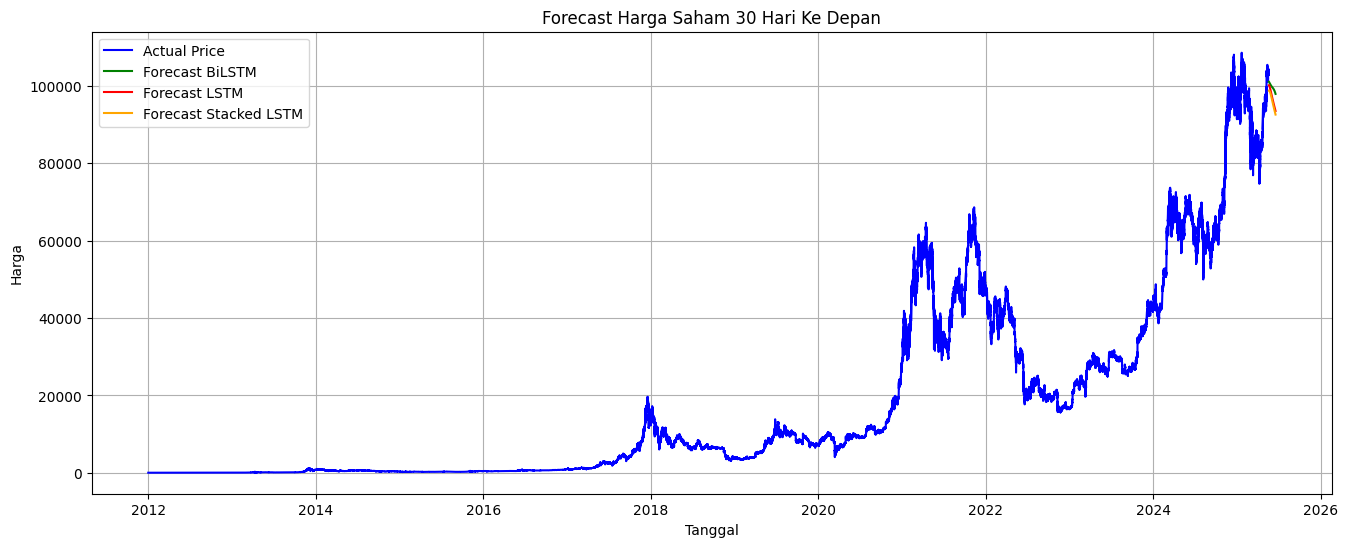

In [122]:
# Plot hasil forecasting
forecast_dates = pd.date_range(data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(16,6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='blue')
plt.plot(forecast_dates, forecast_bilstm, label='Forecast BiLSTM', color='green')
plt.plot(forecast_dates, forecast_lstm, label='Forecast LSTM', color='red')
plt.plot(forecast_dates, forecast_stacked_lstm, label='Forecast Stacked LSTM', color='orange')
plt.title('Forecast Harga Saham 30 Hari Ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()
